In [24]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from PIL import Image
import warnings
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import label_ranking_average_precision_score

warnings.filterwarnings('ignore')
np.random.seed(0)
tf.random.set_seed(0)

In [2]:
cwd = 'D:/rs/'

In [3]:
meta = os.listdir(cwd+'Meta')

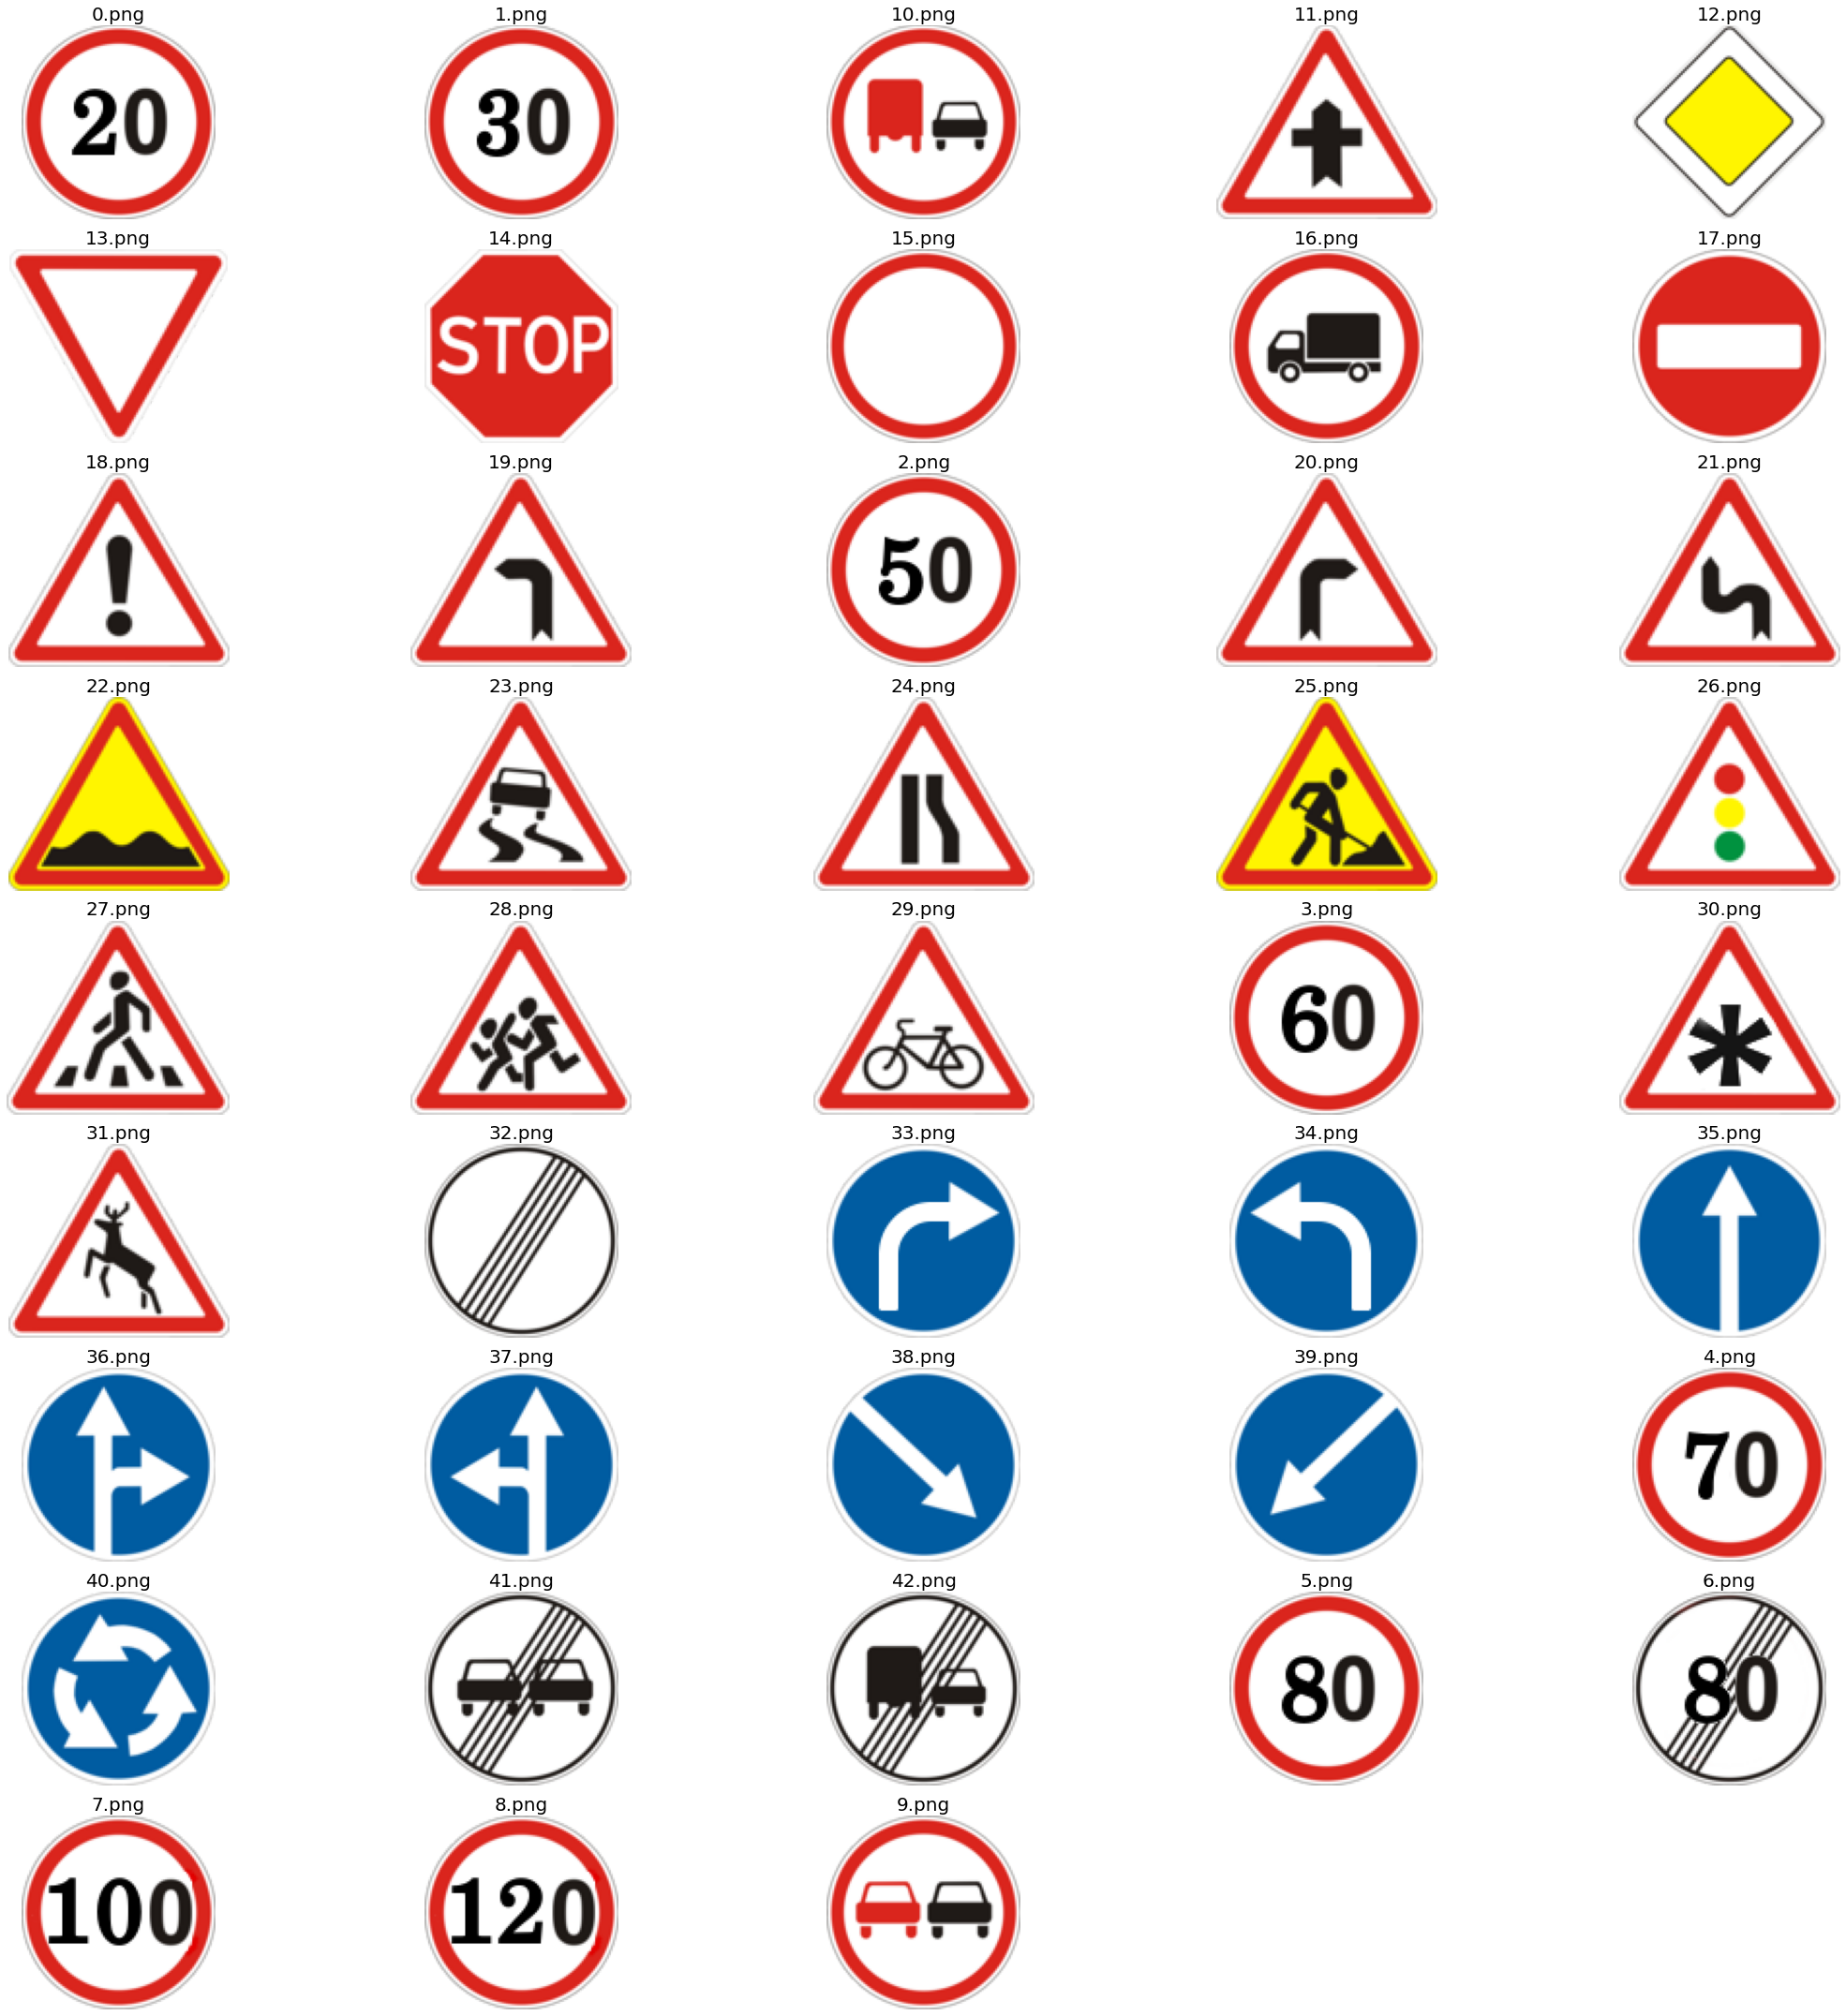

In [4]:
plt.figure(figsize=(30,30))
for i, file in enumerate(meta):
    img = Image.open(cwd+'Meta/'+file)
    ax = plt.subplot(9,5,i+1)
    ax.imshow(img)
    ax.set_title(file, size=20)
    plt.axis('off')
plt.tight_layout()

In [5]:
classes = pd.read_excel(cwd+'classes.xlsx')
classes.drop(labels = ['Unnamed: 3', 'Unnamed: 4'],axis = 1, inplace = True)

In [6]:
classes

,ID,Sign_ID,Name
0,0,3.24.20,Ограничение скорости (20 км/ч)
1,1,3.24.30,Ограничение скорости (30 км/ч)
2,2,3.24.50,Ограничение скорости (50 км/ч)
3,3,3.24.60,Ограничение скорости (60 км/ч)
4,4,3.24.70,Ограничение скорости (70 км/ч)
5,5,3.24.80,Ограничение скорости (80 км/ч)
6,6,3.25.80,Конец ограничения скорости (80 км/ч)
7,7,3.24.100,Ограничение скорости (100 км/ч)
8,8,3.24.120,Ограничение скорости (120 км/ч)
9,9,3.20,Обгон запрещен


In [7]:
train_df = pd.read_excel(cwd+'train.xlsx')
train_df

,ID,Path
0,20,Train/20/00020_00000_00000.png
1,20,Train/20/00020_00000_00001.png
2,20,Train/20/00020_00000_00002.png
3,20,Train/20/00020_00000_00003.png
4,20,Train/20/00020_00000_00004.png
...,...,...
39204,42,Train/42/00042_00007_00025.png
39205,42,Train/42/00042_00007_00026.png
39206,42,Train/42/00042_00007_00027.png
39207,42,Train/42/00042_00007_00028.png


In [8]:
train_x =[]
for i in train_df.Path:
    img = Image.open(cwd+i)       # reading image
    img = img.resize((50,50))     # reasizing image
    train_x.append(np.array(img)) # saving image as array to train

train_y = np.array(train_df.ID)
train_x = np.array(train_x)
print(train_x.shape)
print(train_y.shape)

(39209, 50, 50, 3)
(39209,)


In [9]:
test_df = pd.read_excel(cwd+'test.xlsx')
test_df.head()

,ID,Path
0,16,Test/00000.png
1,1,Test/00001.png
2,38,Test/00002.png
3,33,Test/00003.png
4,11,Test/00004.png


In [10]:
test_x =[]
for i in test_df.Path:
    img = Image.open(cwd+i)
    img = img.resize((50,50))
    test_x.append(np.array(img))

test_y = np.array(test_df.ID)
test_x = np.array(test_x)
print(test_x.shape)
print(test_y.shape)

(12630, 50, 50, 3)
(12630,)


In [11]:
X_train = train_x/255
X_test = test_x/255

y_train = keras.utils.to_categorical(train_y)
y_test = keras.utils.to_categorical(test_y)

In [13]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(31367, 50, 50, 3)
(7842, 50, 50, 3)
(31367, 43)
(7842, 43)


In [15]:
model = keras.models.Sequential()

model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='Same', activation='relu', input_shape=(50, 50, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding = 'Same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='Same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=(2, 2), padding='Same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=256, kernel_size=(2, 2), padding='Same', activation ='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(1024, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(43, activation="softmax"))

model.summary()

model.compile(optimizer=Adam(learning_rate=1e-5), loss="categorical_crossentropy", metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 64)        4864      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 25, 25, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 128)      0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 12, 12, 128)       0

In [16]:
earlystop_cb = keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=5)

In [17]:
history = model.fit(X_train, y_train, batch_size=16, 
                    epochs=50, 
                    validation_data=(X_valid, y_valid),
                    steps_per_epoch=X_train.shape[0] // 16)

Epoch 1/50
1960/1960 [==============================] - 223s 100ms/step - loss: 3.5967 - accuracy: 0.0546 - val_loss: 3.6043 - val_accuracy: 0.0612
Epoch 2/50
1960/1960 [==============================] - 193s 98ms/step - loss: 3.5298 - accuracy: 0.0618 - val_loss: 3.5450 - val_accuracy: 0.0979
Epoch 3/50
1960/1960 [==============================] - 196s 100ms/step - loss: 3.3840 - accuracy: 0.0958 - val_loss: 3.3774 - val_accuracy: 0.1032
Epoch 4/50
1960/1960 [==============================] - 195s 99ms/step - loss: 3.2675 - accuracy: 0.1035 - val_loss: 3.2790 - val_accuracy: 0.1368
Epoch 5/50
1960/1960 [==============================] - 201s 103ms/step - loss: 3.1745 - accuracy: 0.1187 - val_loss: 3.1926 - val_accuracy: 0.1511
Epoch 6/50
1960/1960 [==============================] - 197s 100ms/step - loss: 3.0879 - accuracy: 0.1346 - val_loss: 3.1142 - val_accuracy: 0.1764
Epoch 7/50
1960/1960 [==============================] - 194s 99ms/step - loss: 3.0073 - accuracy: 0.1550 - val_los

In [18]:
model.save('model_50.h5')

<AxesSubplot:>

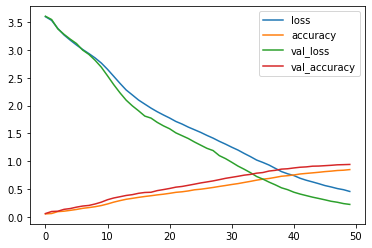

In [19]:
pd.DataFrame(history.history).plot()

In [20]:
loss, accuracy = model.evaluate(X_test,y_test)
print(f'Loss = {loss:.2f}\naccuracy = {accuracy*100:.2f}%')

395/395 [==============================] - 35s 59ms/step - loss: 0.4320 - accuracy: 0.8720
Loss = 0.43
accuracy = 87.20%


In [21]:
prob = model.predict(X_test)
pred = np.argmax(prob, axis=-1)

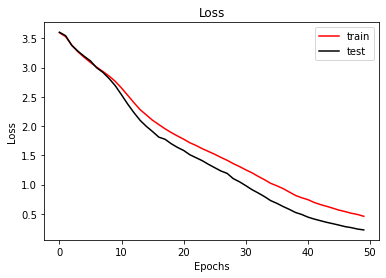

In [25]:
plt.plot(history.history["loss"], c="red")
plt.plot(history.history["val_loss"], c="black")
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["train", "test"])
plt.rcParams["figure.figsize"] = (10, 10)
plt.show()

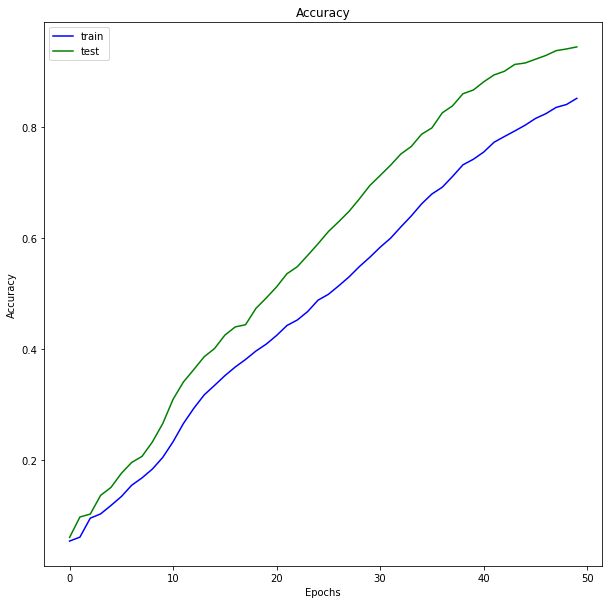

In [26]:
plt.plot(history.history["accuracy"], c="blue")
plt.plot(history.history["val_accuracy"], c="green")
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["train", "test"])
plt.rcParams["figure.figsize"] = (10, 10)
plt.show()

In [27]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Metrix =  ', score[1])
predictions = model.predict(X_test, batch_size=32)
print('LRAP =  ', label_ranking_average_precision_score(y_test, predictions))

Metrix =   0.8719714879989624
LRAP =   0.9218942140783594


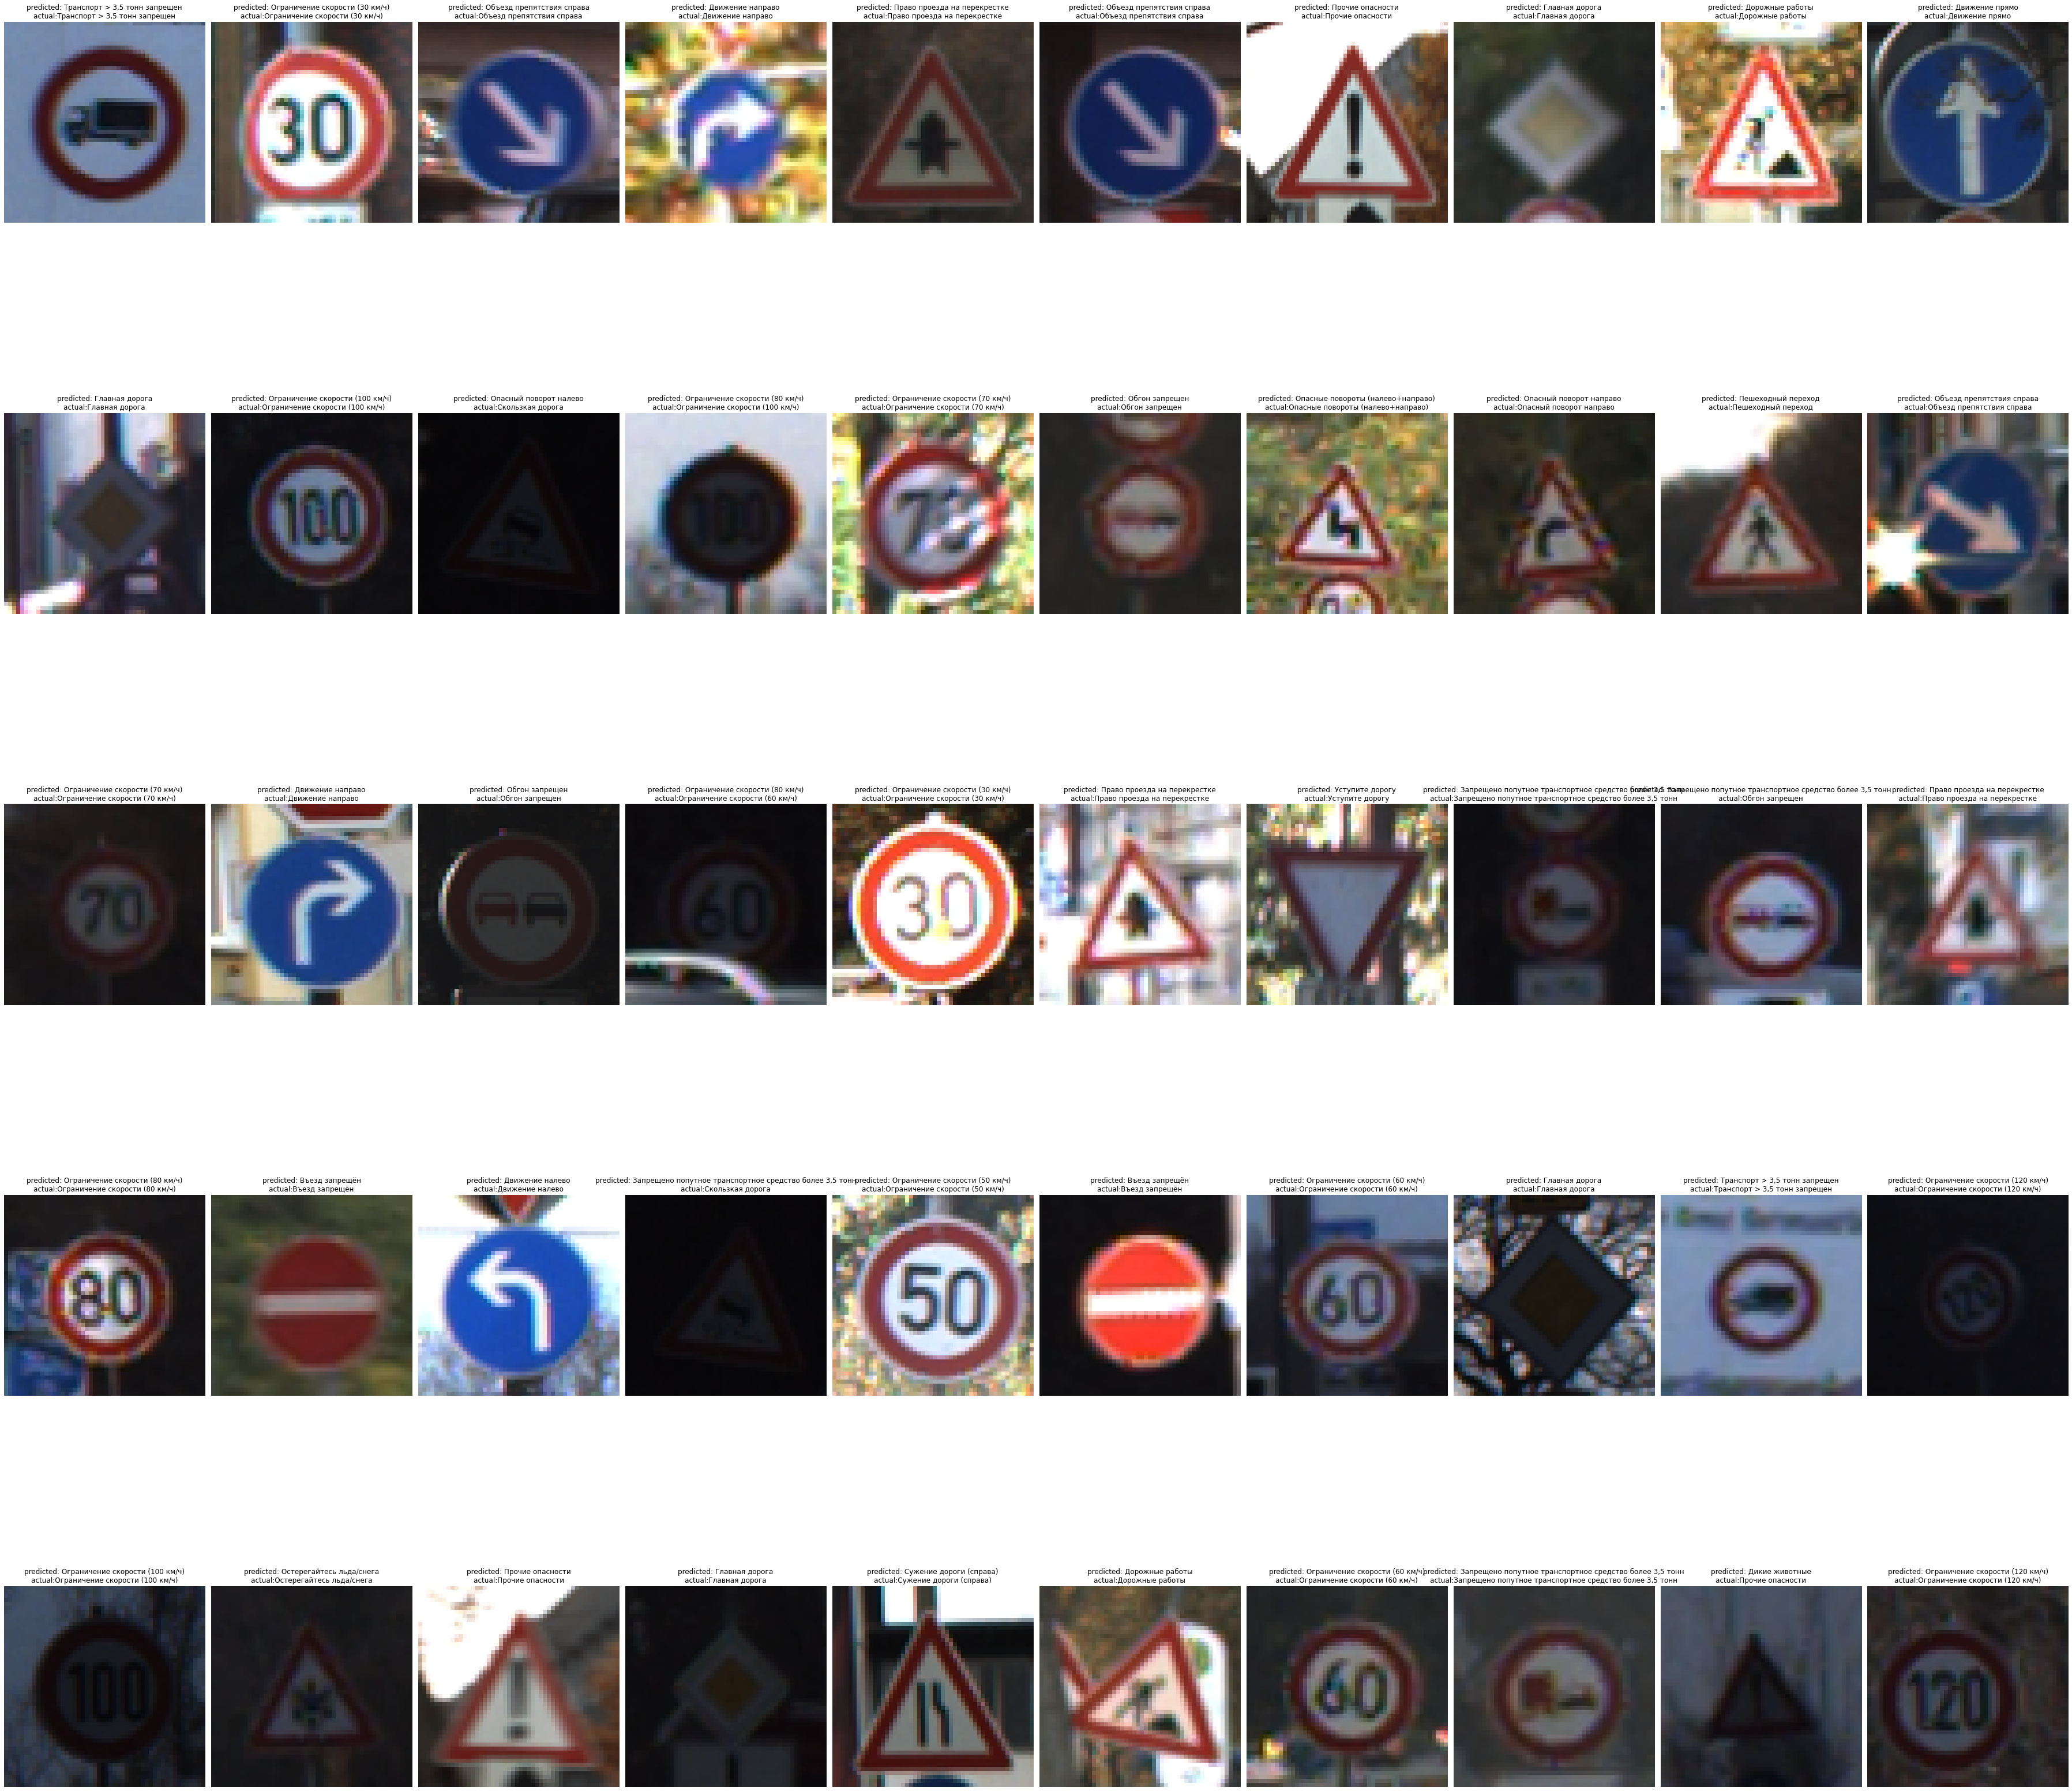

In [28]:
plt.figure(figsize=(50,50))
for i in range(50):
    ax = plt.subplot(5,10,i+1)
    ax.imshow(X_test[i])
    ax.set_title(f'predicted: {classes.Name[pred[i]]}\nactual:{classes.Name[test_y[i]]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [29]:
model.save_weights("road_signs")